## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [26]:
# This must be run within a Google Colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [27]:
import sys
sys.path.append('/content/gdrive/My Drive/RL/.')
#sys.path.append('</dir/to/start/code/folder/.>')

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [28]:
!pip install numpy==1.26.4
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

print(np.__version__)

1.26.4


## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [29]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)

    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step - 1], 1 / step,r)
    q_f[step] =  estimate(q_f[step - 1], FixedStepSize,r)
    # YOUR CODE ENDS HERE
    ############################

q_h = q_h[1:]
q_f = q_f[1:]

Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />

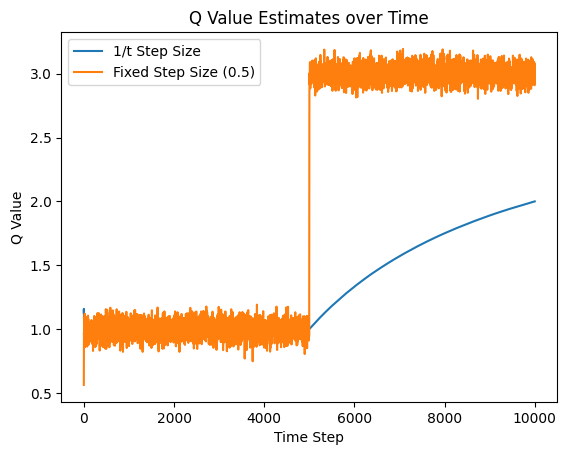

In [30]:
############################
# YOUR CODE STARTS HERE
import matplotlib.pyplot as plt

plt.plot(q_h, label='1/t Step Size')
plt.plot(q_f, label='Fixed Step Size (0.5)')
plt.title('Q Value Estimates over Time')
plt.xlabel('Time Step')
plt.ylabel('Q Value')
plt.legend()
plt.show()

# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [31]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, 0)
e_greedy_action = epsilon_greedy(q, 0.1)
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment

In [32]:
env = gym.make('FrozenLake-v1')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [33]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [34]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [35]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations to converge = 7


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [36]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [37]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352513 0.82352369 0.82352267 0.82352214 0.82352544 0.
 0.5294087  0.         0.82352604 0.82352689 0.76470365 0.
 0.         0.88235115 0.94117554 0.        ]
Number of iterations to converge = 500


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [38]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [39]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 20000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.88862824 0.88356707 0.88218372 0.89527969]
 [0.55194413 0.59491151 0.67452565 0.89527969]
 [0.70068769 0.71608304 0.63288559 0.89527969]
 [0.61502514 0.59384391 0.43331183 0.89527969]
 [0.87429257 0.62784691 0.6969944  0.6209763 ]
 [0.         0.         0.         0.        ]
 [0.30972265 0.32131045 0.51401699 0.20580557]
 [0.         0.         0.         0.        ]
 [0.54341721 0.45082494 0.61837914 0.85838624]
 [0.44869996 0.85344844 0.5257807  0.55556659]
 [0.77946479 0.60507307 0.43151107 0.44551189]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59109075 0.73297357 0.89474464 0.72801782]
 [0.91769049 0.95053941 0.91691555 0.9082223 ]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

---



In [40]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v1')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [41]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 20000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.37123831 0.31889445 0.31664217 0.3137943 ]
 [0.2079961  0.25171106 0.21596933 0.30874075]
 [0.24971063 0.24394972 0.24014323 0.26041227]
 [0.18907348 0.1704372  0.08541709 0.26436275]
 [0.38918867 0.2640139  0.19090245 0.27639505]
 [0.         0.         0.         0.        ]
 [0.15387321 0.13316163 0.19631791 0.085036  ]
 [0.         0.         0.         0.        ]
 [0.22214518 0.31781657 0.27103488 0.45586472]
 [0.31873148 0.56125693 0.34288061 0.2757171 ]
 [0.56868645 0.37449467 0.37344054 0.18350434]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46919919 0.45824431 0.63005407 0.43908949]
 [0.58489066 0.84433509 0.68238771 0.7028853 ]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [42]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v1')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [43]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#env = gym.make('FrozenLake-v1')
#human_play(env)

Action indices: LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3


KeyboardInterrupt: Interrupted by user

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in [Chapter 2.3](http://incompleteideas.net/book/RLbook2020.pdf).<br />

In [44]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE


num_bandits = 2000      # number of independent tasks
num_arms = 10           # 10-armed bandit
num_steps = 1000        # plays per task

epsilons = [0.0, 0.01, 0.1]   # greedy, ε=0.01, ε=0.1
avg_rewards = np.zeros((len(epsilons), num_steps))

for b in range(num_bandits):
    # True action values Q* ~ N(0, 1) for this bandit
    q_star = np.random.randn(num_arms)

    for ei, eps in enumerate(epsilons):
        q_est = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)

        for t in range(num_steps):
            # ε-greedy action selection
            if np.random.rand() < eps:
                a = np.random.randint(num_arms)
            else:
                a = np.argmax(q_est)

            # Reward ~ N(q_star[a], 1)
            r = q_star[a] + np.random.randn()

            # Incremental sample-average update
            action_counts[a] += 1
            q_est[a] += (1.0 / action_counts[a]) * (r - q_est[a])

            # Accumulate reward for averaging later
            avg_rewards[ei, t] += r

# Average over all bandits
avg_rewards /= num_bandits

# YOUR CODE ENDS HERE
############################

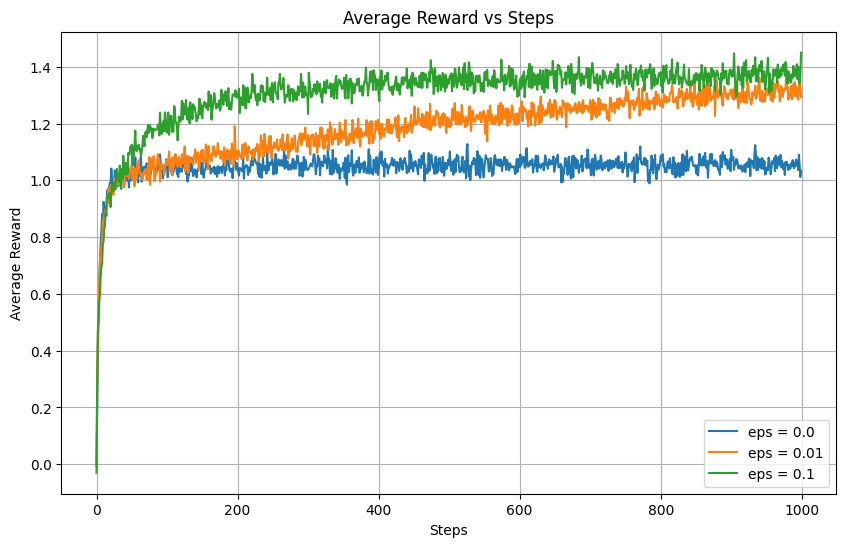

In [45]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(avg_rewards[0], label='eps = 0.0')
plt.plot(avg_rewards[1], label='eps = 0.01')
plt.plot(avg_rewards[2], label='eps = 0.1')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')
plt.legend()
plt.grid(True)
plt.show()


# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.